## Accuracy(정확도)
* 정확도 = 예측 결과가 동일한 데이터 건수/ 전체 예측 건수

## Confusion Matrix
* 결과값 [TN FP]/[FN TP] 순서다

## Precision과 Recall

In [6]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}')

In [7]:
import numpy as np
import pandas as pd
from modules import DtPre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
titanic_df = pd.read_csv("./datasets/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제
X_titanic_df = DtPre.transform_features(X_titanic_df) # 만들어둔 전처리 함수 적용
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=11)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\da_hye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Precision/Recall Trade-off
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임계값(Threshold) 조정을 통해 정밀도 또는 재현율의 수치를 높일 수 있음
* 앞이 0 뒤가 1이 될 확률

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print(f'pred_proba()결과 Shape : {pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 샘플로 추출 \n: {pred_proba[:3]}')

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print(f'두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n {pred_proba_result[:3]}')

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46150875 0.53849125]
 [0.87861148 0.12138852]
 [0.8772111  0.1227889 ]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46150875 0.53849125 1.        ]
 [0.87861148 0.12138852 0.        ]
 [0.8772111  0.1227889  0.        ]]


In [10]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0, 크면 1
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


### sklearn.preprocessing.Binarizer
* class sklearn.preprocessing.Binarizer(*, threshold=0.0, copy=True)
* 임계값에 따라 데이터 이진화(특성 값을 0 또는 1로 설정).

임계값보다 큰 값은 1로 매핑되고 임계값보다 작거나 같은 값은 0으로 매핑됩니다. 기본 임계값이 0이면 양수 값만 1로 매핑됩니다.

In [11]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [14]:
# 분류 결정 임곗값을 0.5에서 0.4로 낮춤  (recalldl 더 중요)
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


In [17]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임곗값:{custom_threshold}')
        get_clf_eval(y_test , custom_predict)
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값:0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값:0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값:0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값:0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값:0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


### sklearn.metrics.plot_precision_recall_curve
* sklearn.metrics.plot_precision_recall_curve(estimator, X, y, *, sample_weight=None, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)

In [38]:
len(pred_proba_class1)

179

In [26]:
from sklearn.metrics import precision_recall_curve

# 레이블 값 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print(f'반환된 분류 결정 임곗값 배열의 Shape: {thresholds.shape}')
print(f'반환된 precisions 배열의 Shape: {precisions.shape}')
print(f'반환된 recalls 배열의 Shape: {recalls.shape}')
print(f'\nthresholds 5 sample : {thresholds[:5]}')
print(f'precisions 5 sample : {precisions[:5]}')
print(f'recalls 5 sample : {recalls[:5]}')


thr_index = np.arange(0, thresholds.shape[0], 15)
print(f'샘플 추출을 위한 임계값 배열의 index 10개:{thr_index}')
print(f'샘플용 10개의 임곗값: {np.round(thresholds[thr_index], 2)}')

print(f'샘플 임계값별 정밀도: {np.round(precisions[thr_index], 3)}')
print(f'샘플 임계값별 재현율: {np.round(recalls[thr_index], 3)}')

반환된 분류 결정 임곗값 배열의 Shape: (143,)
반환된 precisions 배열의 Shape: (144,)
반환된 recalls 배열의 Shape: (144,)

thresholds 5 sample : [0.1039561  0.10395833 0.10398338 0.10754884 0.108937  ]
precisions 5 sample : [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample : [1.         0.98360656 0.98360656 0.98360656 0.96721311]
샘플 추출을 위한 임계값 배열의 index 10개:[  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [29]:
print(f'\nthresholds 5 sample : {thresholds[-5:]}')
print(f'precisions 5 sample : {precisions[-5:]}')
print(f'recalls 5 sample : {recalls[-5:]}')



thresholds 5 sample : [0.94891528 0.94909528 0.95059713 0.95191472 0.96512597]
precisions 5 sample : [1. 1. 1. 1. 1.]
recalls 5 sample : [0.08196721 0.06557377 0.04918033 0.03278689 0.        ]


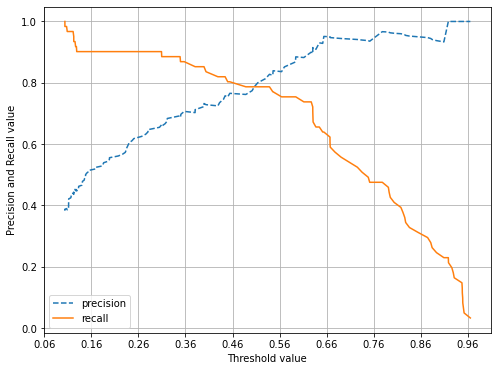

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


## sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

In [39]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어 : {f1:.4f}')

F1 스코어 : 0.7805


In [43]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f},F1 : {f1:.4f}')
          
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값:0.4
오차행렬
[[99 19]
 [10 51]]
정확도 : 0.8380, 정밀도 : 0.7286, 재현율 : 0.8361,F1 : 0.7786
임곗값:0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033,F1 : 0.7840
임곗값:0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869,F1 : 0.7805
임곗값:0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541,F1 : 0.7931
임곗값:0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377,F1 : 0.8036


## sklearn.metrics.plot_roc_curve
* sklearn.metrics.plot_roc_curve(estimator, X, y, *, sample_weight=None, drop_intermediate=True, response_method='auto', name=None, ax=None, pos_label=None, **kwargs)

In [45]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print(f'샘플 추출을 위한 임곗값 배열 index:{thr_index}')
print(f'샘플 index로 추출한 임곗값:{np.round(thresholds[thr_index], 2)}')

print(f'샘플 임곗값별 FPR: {np.round(fprs[thr_index], 3)}')
print(f'샘플 임곗값별 TPR: {np.round(tprs[thr_index], 3)}')


샘플 추출을 위한 임곗값 배열 index:[ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값:[0.97 0.65 0.63 0.56 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값별 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


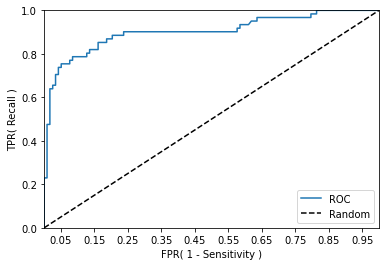

In [62]:
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [81]:
# plt.plot(fprs , tprs, label='ROC')
# plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
# # start, end = plt.xlim()
# plt.xticks(np.round(np.arange(start, end, 0.2),2))
# plt.xlim(0,1); plt.ylim(0,1)
# plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
# plt.legend()
# plt.show()

In [64]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(X_test)
roc_score = roc_auc_score(y_test, pred)
print(f'ROC AUC 값: {roc_score:.4f}')

ROC AUC 값: 0.8341
